# Part I  - Exploration and Analysis of Loan Data from Prosper

### by F Njakai



## Table of Contents

* [Introduction](#intro)
* [Preliminary Wrangling](#prel-wrangling)
* [Univariate Exploration](#univar)
* [Bivariate Exploration](#bivar)
* [Multivariate Exploration](#multivar)
* [Summary of Findings](#summary)
* [Conclusions](#outro)

<div id="intro"></div>

## Introduction

[Prosper](https://www.prosper.com/) is a peer-to-peer lending marketplace. Borrowers apply online for a fixed-rate, fixed-term loan between USD 2,000.00 and USD 40,000.00. Individuals, like you and I, and institutions, Sequoia Capital for example, invest in said loans. Prosper handles all loan servicing on behalf of the borrowers and investors.

The data set at hand has 113,937 observations (loans, if you like) and 81 variables; detailed information on the variables can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). Observations relate to the years 2005 to 2014, inclusive.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.

<div id="prel-wrangling"></div>



## Preliminary Wrangling


In [1]:
#import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

%matplotlib inline

#### Default settings for plots

Automate, as much as possible, the process of creating visualisations

Why?
* it is efficient
* visualisations are consistent

How?
* create templates


In [2]:
#template no. 1

#blue colour in `seaborn` plots
default_blue = sns.color_palette('tab10')[0]

#orange colour in `seaborn` plots
default_orange = sns.color_palette('tab10')[1]


#default

In [3]:
#template no. 2

'''
simple function to create `Figure` object
using matplotlib that contains an x-lab,
y-lab and title.

"Father Figure", if you like :)

3 params, all type `str`:
x_lab, y_lab and title

Please make sure all args passed to the 
function are type `str`

return: None
'''
def create_fig(x_lab: str, y_lab: str, title: str):
    """create_fig function"""
    try:
        #fig size
        plt.figure(figsize=(10, 6.18), dpi=216, frameon=False, clear=True)
        #x-axis name
        plt.xlabel(x_lab)
        #y-axis name 
        plt.ylabel(y_lab)
        #title
        plt.title(title)
    except ModuleNotFoundError:
        print(f'Please `import matplotlib.pyplot as plt` and try again')
    except:
        print(f'Failed to create template')
        raise


In [4]:
##template no. 3

'''
simple function to create `Figure` object
using matplotlib for sub-plots.

"Father Figure" for subplots :)

No params.

return: None
'''
def create_sub():
    """create_sub function"""
    try:
        #fig size
        fig, ax = plt.subplots(figsize=(10,6.18), dpi=216)
    except ModuleNotFoundError:
        print(f'Please `import matplotlib.pyplot as plt` and try again')
    except:
        print(f'Failed to create template')
        raise


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [5]:
#see if a df exists

'''
a simple function to see if a df exists

takes in 1 param: name of the df

Please do not pass the arg as a string

return: None
'''

def confirm_exists(df):
    """ function confirm_exists """
    if not df.empty:
        print(f'This dataframe exists')
        return
    print(f'This dataframe does not exist')
    



In [10]:
#group data and find mean

'''
Function to calculate mean of
grouped data

Takes in 2 args: var_1 and var_2

Both args must be columns of a pandas DF

return: average  of grouped data
'''

def group_avg(var_1, var_2):
    """ function group_avg"""
    if var_1 and var_2:
        avg_gp_data = df.groupby(var_1)[var_2].mean()
        return avg_gp_data
    else:
        print(f'Check that both arguments are columns of a pandas DF and try again')

In [11]:
#group data and find sum

'''
Function to calculate sum of
grouped data

Takes in 2 args: var_1 and var_2

Both args must be columns of a pandas DF

return: sum  of grouped data
'''

def group_sum(var_1, var_2):
    """ function group_sum"""
    if var_1 and var_2:
        sum_gp_data = df.groupby(var_1)[var_2].sum()
        return sum_gp_data
    else:
        print(f'Check that both arguments are columns of s pandas DF and try again')

In [6]:
#load the data set
df = pd.read_csv('prosperLoanData.csv', sep=',')
confirm_exists(df)

This dataframe exists


In [4]:
df.shape

(113937, 81)

In [5]:
df.duplicated().value_counts()

False    113937
dtype: int64

In [8]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [12]:
df.sample(randint(5, 15))

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
95131,2A443364897206503365C0F,948,2006-03-01 03:08:25.490000000,HR,36,Defaulted,2006-11-08 00:00:00,0.29776,0.2900,0.2850,...,-3.18,0.00,2424.97,2424.97,0.0,1.0,0,0,0.0,32
94117,F53735261559946411A012C,526347,2011-09-08 14:42:39.037000000,NaN,36,Current,NaN,0.30532,0.2699,0.2599,...,-31.40,-13.06,0.00,0.00,0.0,1.0,0,0,0.0,14
29461,33F635700508690226D72F1,703764,2013-01-22 16:49:41.223000000,NaN,60,Chargedoff,2013-08-30 00:00:00,0.22262,0.1982,0.1882,...,-35.37,0.00,21539.69,21539.69,0.0,1.0,0,0,0.0,357
41774,15DA35369257124735F907A,553091,2012-01-21 00:51:01.963000000,NaN,60,Current,NaN,0.15784,0.1396,0.1296,...,-176.17,0.00,0.00,0.00,0.0,1.0,0,0,0.0,30
86906,B4B735819173748414A4157,805198,2013-06-11 11:12:28.510000000,NaN,60,Completed,2013-11-13 00:00:00,0.21156,0.1874,0.1774,...,-62.22,0.00,0.00,0.00,0.0,1.0,0,0,0.0,75
62677,1EFD3603289854858A47913,1246163,2014-03-08 07:51:47.843000000,NaN,60,Current,NaN,0.20321,0.1790,0.1690,...,0.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
82361,568C3549206755043E3DF93,593169,2012-05-26 13:23:32.223000000,NaN,36,Completed,2012-09-28 00:00:00,0.15538,0.1270,0.1170,...,-70.46,0.00,0.00,0.00,0.0,1.0,0,0,0.0,463
50369,D334350127813015687BB91,486105,2010-11-29 18:35:47.087000000,NaN,36,Completed,2014-01-17 00:00:00,0.35858,0.3220,0.3120,...,-136.16,-108.07,0.00,0.00,0.0,1.0,0,0,0.0,131
40198,8F3E35276522198506A1F80,531277,2011-10-06 11:43:05.020000000,NaN,36,Completed,2013-01-08 00:00:00,0.27467,0.2399,0.2299,...,-106.30,0.00,0.00,0.00,0.0,1.0,0,0,0.0,111
73897,4292358965888224511D914,900907,2013-09-16 18:44:56.320000000,NaN,60,Current,NaN,0.20808,0.1840,0.1740,...,-61.56,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1


### Structure

#### Overall

* 113,937 observations
* 81 variables
    * 3 of type `bool`
    * 50 of type `float`
    * 11 of type `int`
    * 17 of type `str`
* variable `LoanOriginationDate` is of type `str`
* more...

#### Missing and null values

* some observations in `df` have missing or null values
    * case(s) in point
        * 100,596 under variable `GroupKey`
        * 96,985 under variable `LoanFirstDefaultedCycleNumber`
    * will decide which ones to fill and/or drop on a case-by-case basis
        * Why?
            * some variables are [qualitative](https://www.statology.org/qualitative-vs-quantitative-variables/)
            * some variables apply to an observation conditionally
                * example: `GroupKey` is about groups that observations fall under; the number of said groups cannot  be reasonably expected to be 113,937
                

#### Duplicated observations

* `df` has no duplicated observations

#### Multiple values for a variable

* observations in `df` have 1 value per variable 



### Feature(s) of interest in dataset

> Your answer here!

### Feature(s) in the dataset that may help support investigation into feature(s) of interest

> Your answer here!


### Clean the data set

* will perform a chap-chap cleaning process viz:
    * drop variables whose missing values are above a threshold (in this case, 15%)
    * drop observations whose missing values are above a threshold (in this case, 10%)

In [7]:
#drop variables whose missing values are above the threshold
df.drop(columns=df.columns[df.eq(0).mean()>0.85], inplace=True)
df.shape

(113937, 72)

In [8]:
#drop observations whose missing values are above the threshold
df.drop(index=df.index[df.eq(0).mean()>0.9], inplace=True)
df.shape

/opt/conda/lib/python3.6/site-packages/pandas/core/indexes/base.py:2095: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 113937 but corresponding boolean dimension is 72
  result = getitem(key)


(113937, 72)

In [9]:
#change the type of variable `LoanOriginationDate` to `datetime`
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)

<div id="univar"></div>

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Method

   * ask a question
      * state what will be done to answer the question
   * code
      * do what was stated
   * findings
   * visualisation


### Question #1

#### What is the average amount borrowed?

* QED: find the mean of `LoanOriginalAmount`
* will look at the quartiles and std dev too

In [25]:
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

#### Findings

* average amount borrowed is _c._ USD 8,337.00
* loans of amount USD 5k, 10k, 15k, 20k and 25k have higher-than-average frequency
* the range is USD 1,000.00 to 35,000.00
    * [Prosper's website](https://www.prosper.com/about) says USD 2,000.00 to 40,000.00
    * this could be, among others:
        * `Prosper` could have revised its loan policy
        * `Prosper` could have increased its product offering
* the CV is _c._ 0.75 (6245.80058/8337.01385); this suggests that majority of the observations are close to the mean
    * majority of the amounts are in the range USD 1,000.00 to 15,000.00
* the mean is greater than the median (50%); this suggests a skew to the right


a histogram of the above...

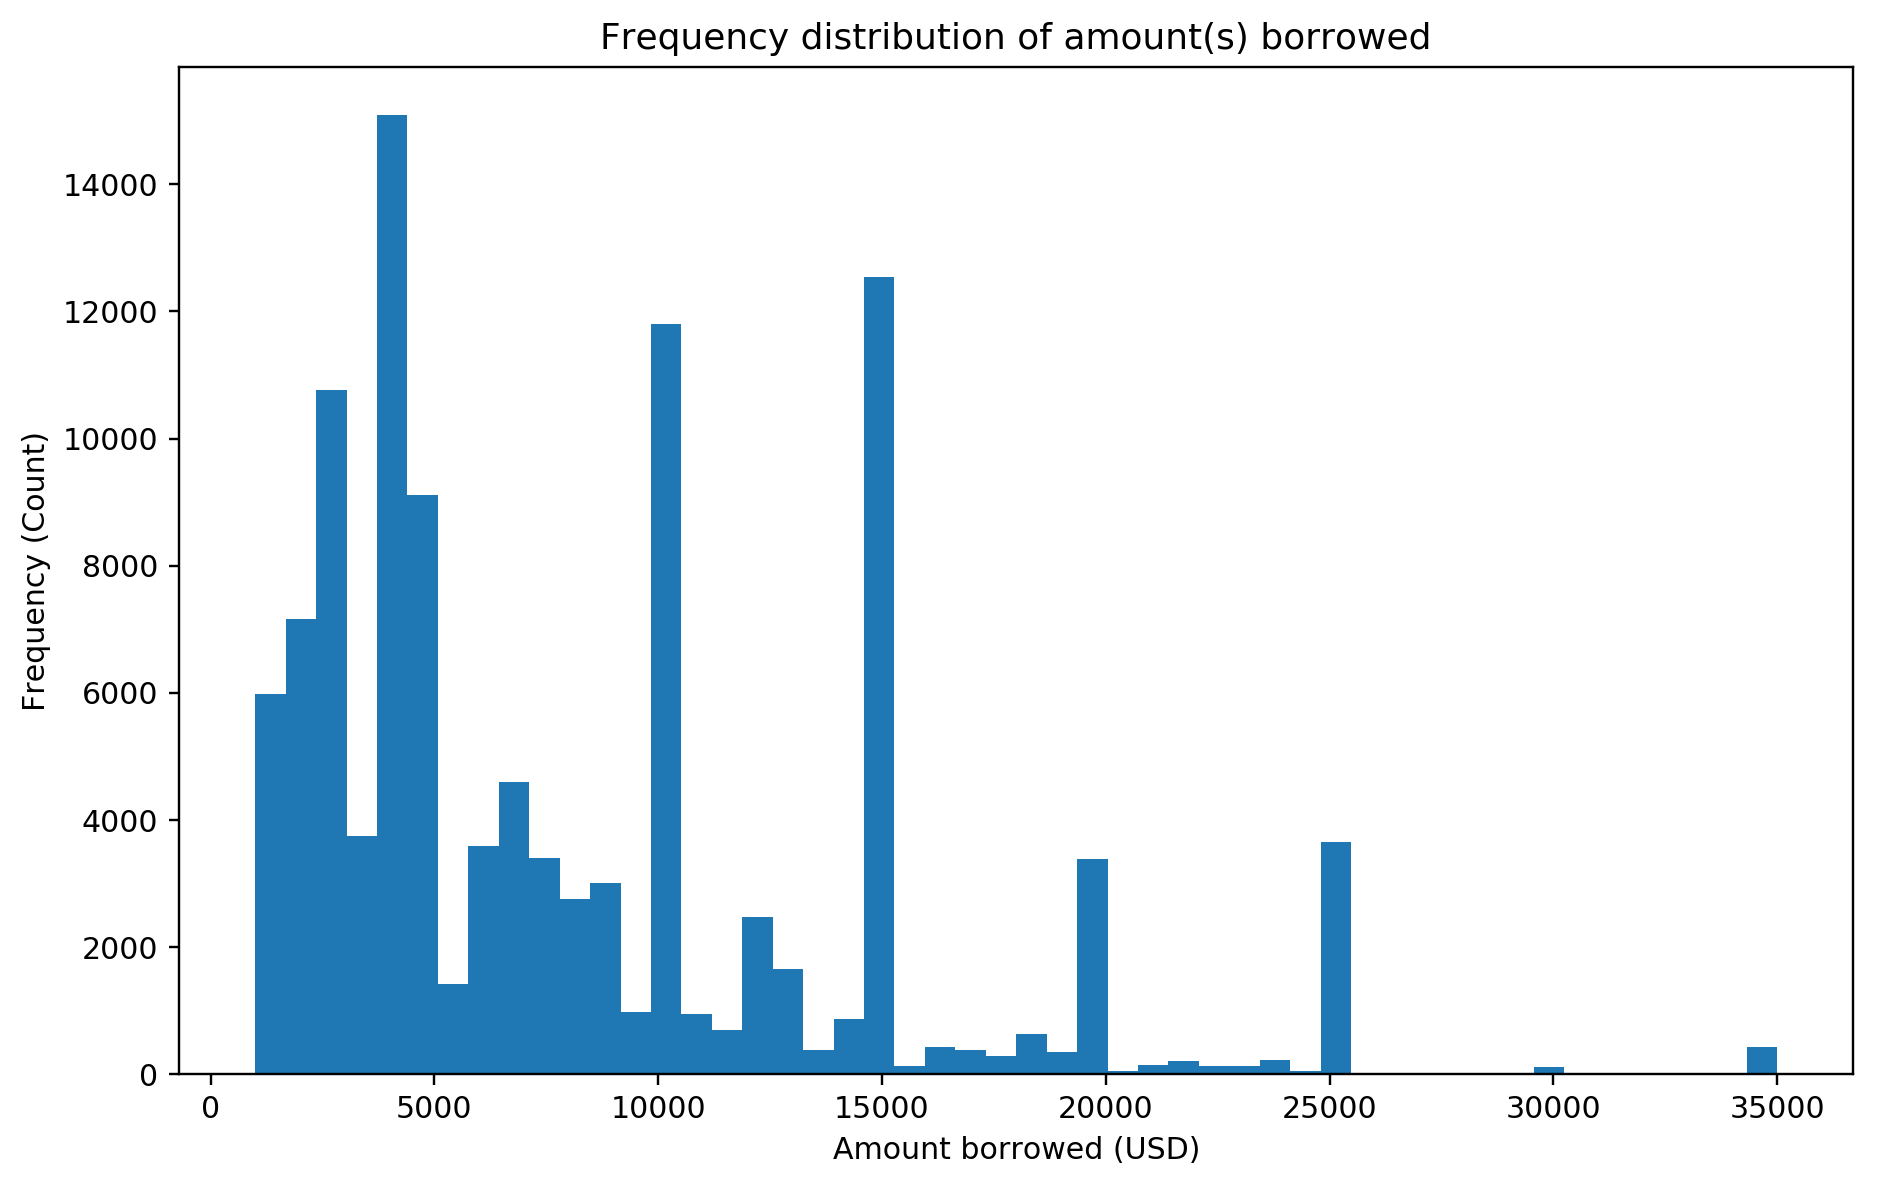

In [21]:
#create a hist
create_fig('Amount borrowed (USD)','Frequency (Count)','Frequency distribution of amount(s) borrowed')
plt.hist(df.LoanOriginalAmount, bins=50);

### Question #2

#### What is the average rate of borrowing?

* find the mean of `BorrowerRate`
* look at quartile and std dev too

In [13]:
df.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

#### Findings

* average rate is _c._ 0.19%
* the range is zero to 0.5%
    * does `Prosper` offer interest-free loans?
    * if yes:
        * who do they lend to at that rate?
        * why?
        * what are the pre-requisites and terms?
* the CV is _c._ 0.39 (0.074818/0.192764); this suggests that observations are more or less evenly distributed around the mean
    * there are, however, rates that have higher-than-average frquency at the range 0.08% to 0.35%
* the mean is slightly greater than the median (50%); this suggests a slight skew to the right


a histogram of the above supports the findings...

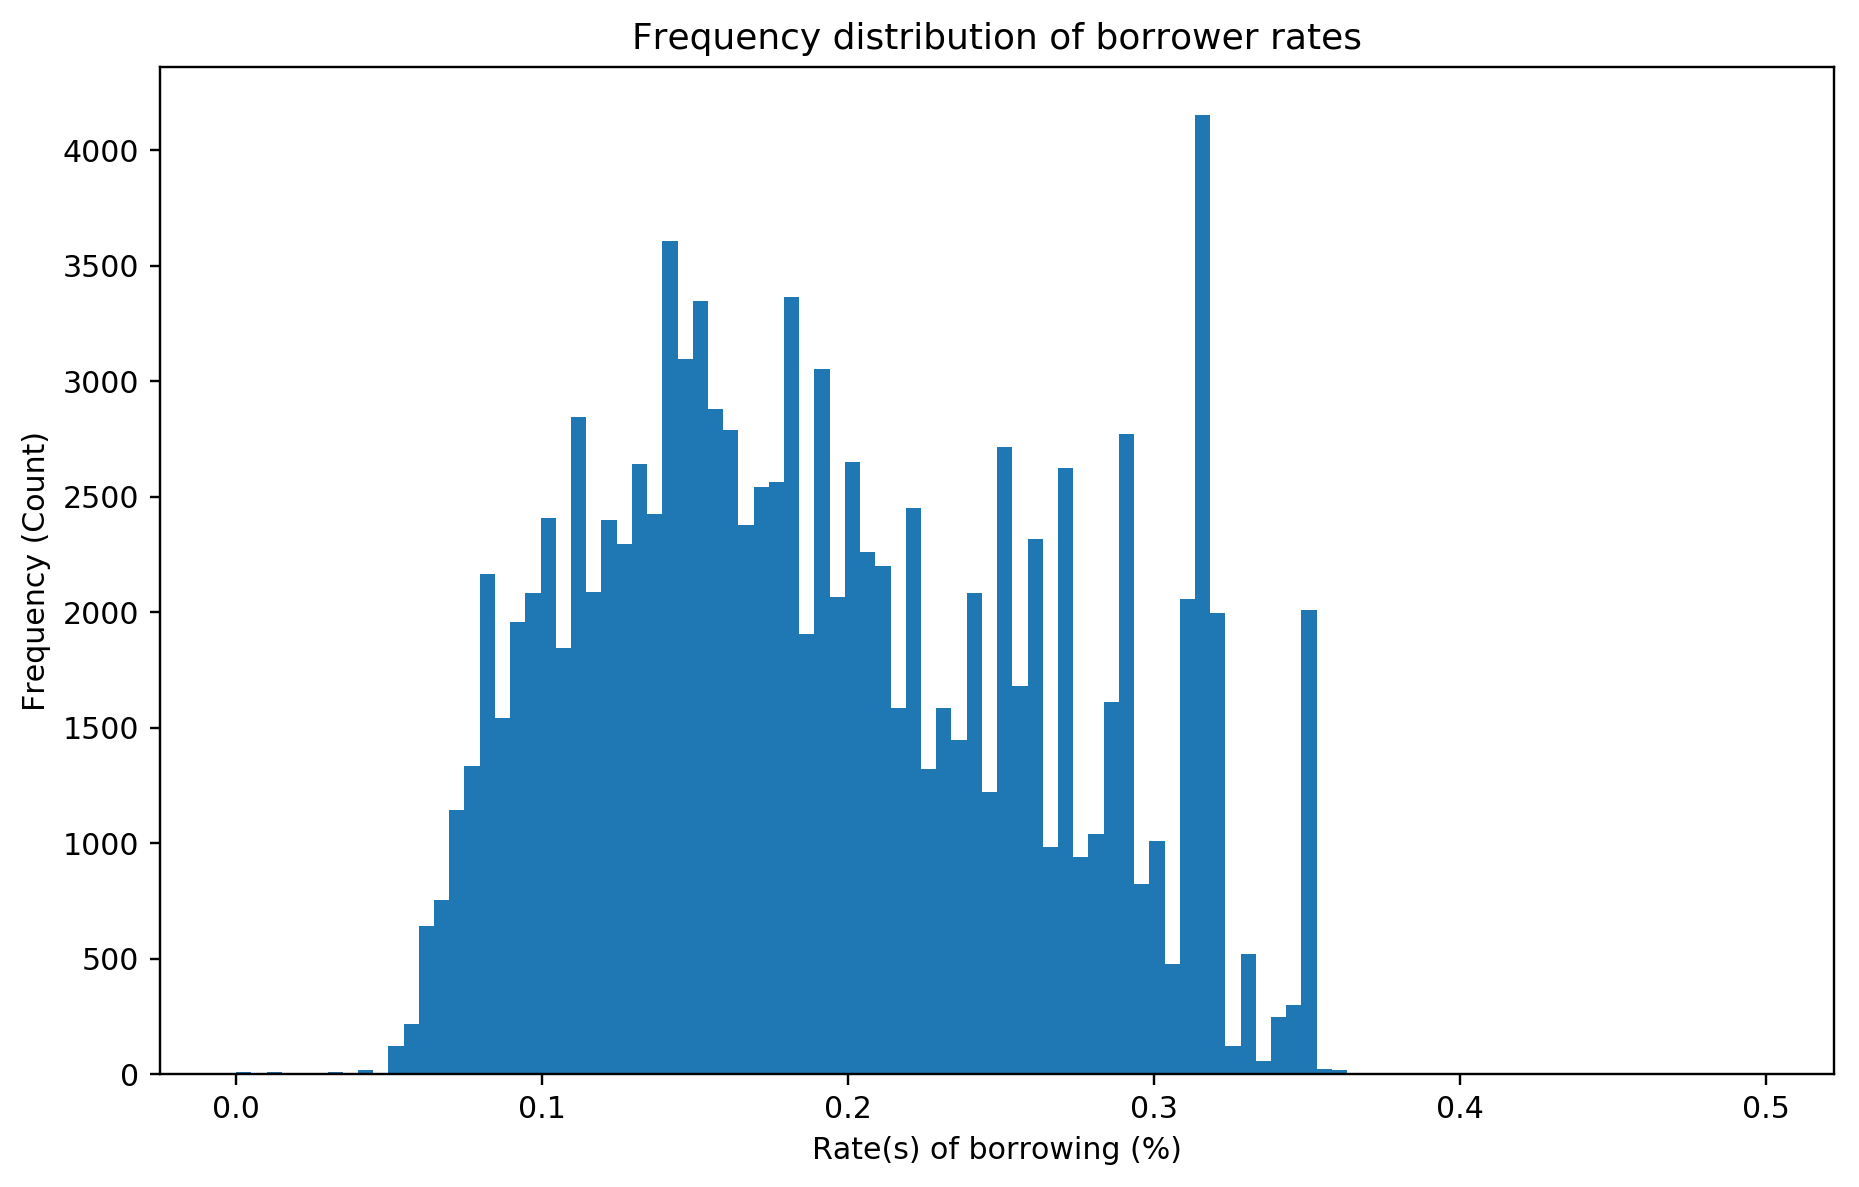

In [10]:
#create hist
create_fig('Rate(s) of borrowing (%)', 'Frequency (Count)', 'Frequency distribution of borrower rates')
plt.hist(df.BorrowerRate, bins=100);

### Question #3

#### How does the number of loans issued behave over the years?

* does it change at all?
    * if yes, what is the direction of change?
* plot the number of loans issued against `LoanOriginationDate `

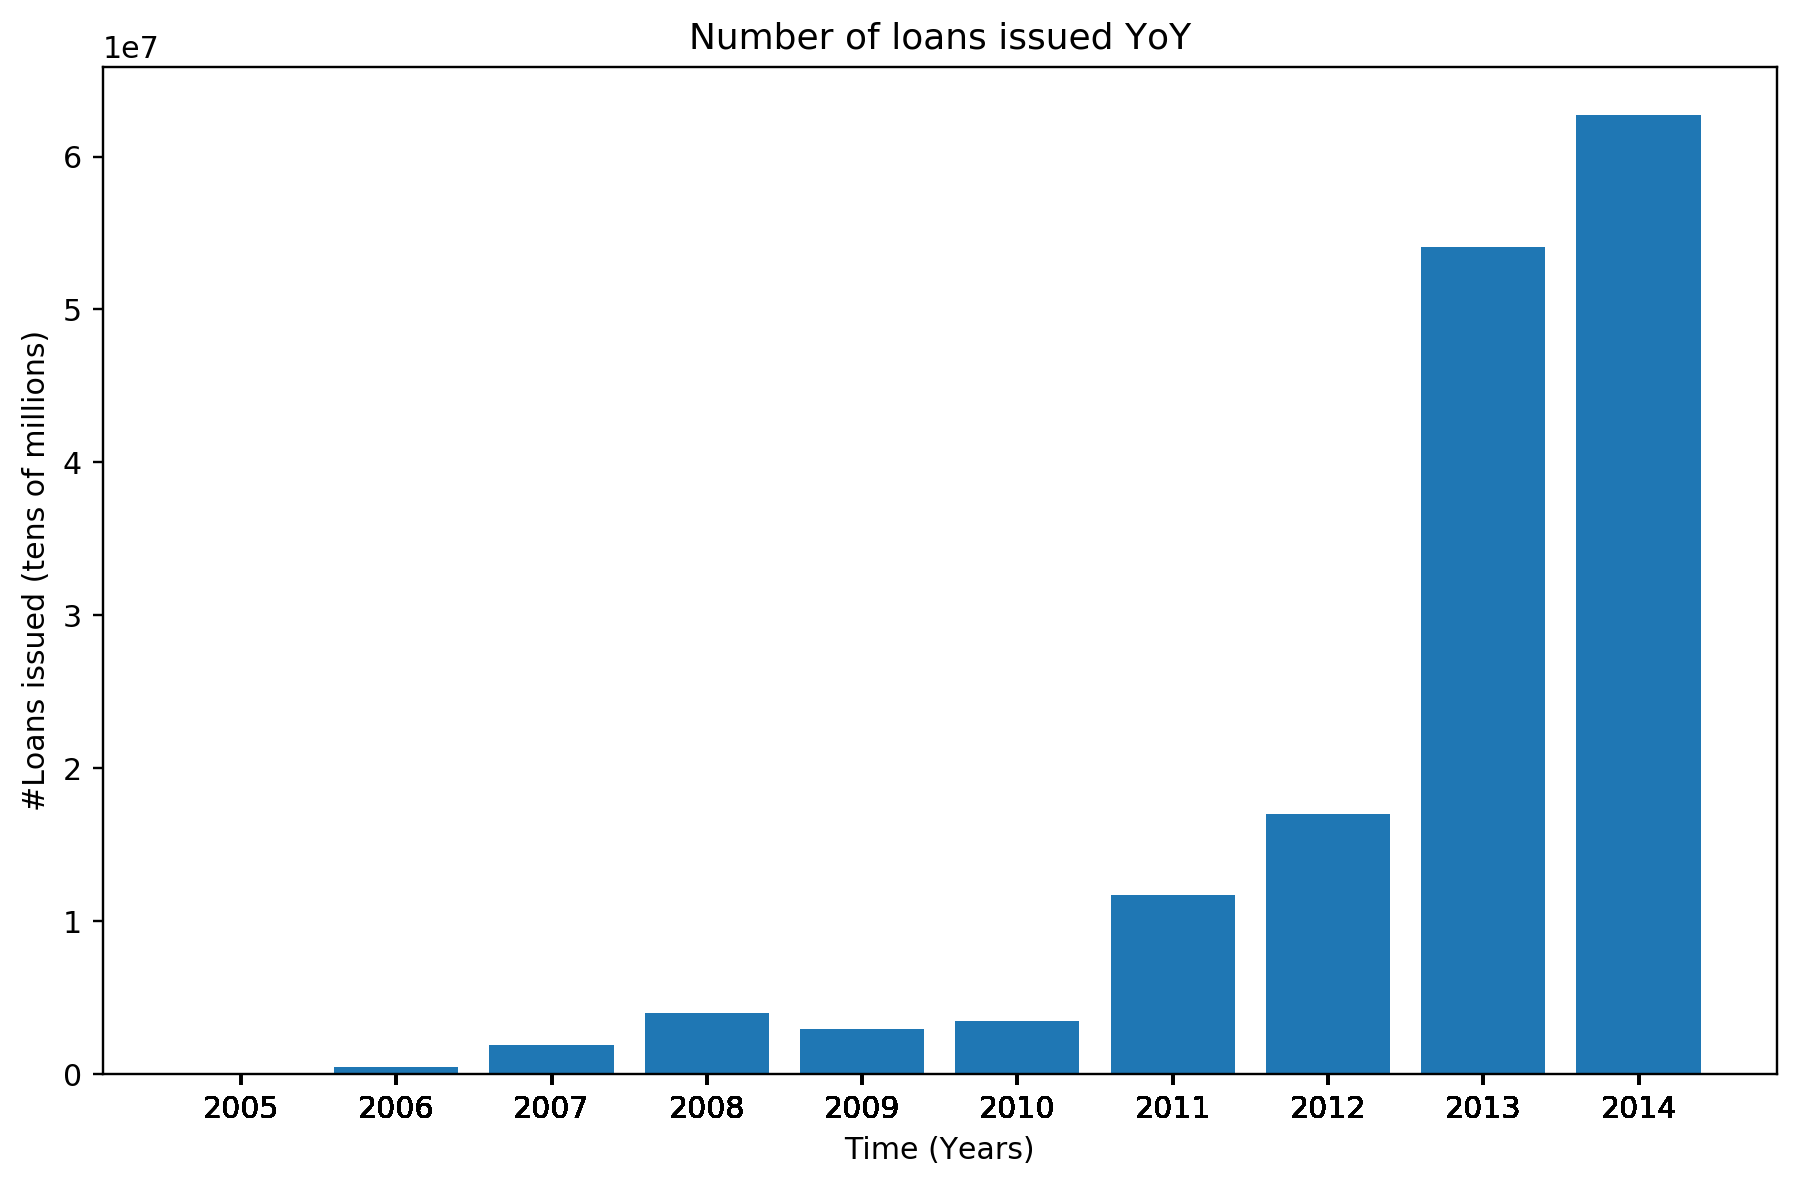

In [61]:
#sum of loans by year
sum_loan_time = group_sum('LoanOriginationDate','LoanNumber')

#number of loans disbursed
y = [sum_loan_time.values[i] for i in range(len(sum_loan_time))]

#time (years)
x = [sum_loan_time.index[i].year for i in range(len(sum_loan_time))]

#create plot
create_fig('Time (Years)', '#Loans issued (tens of millions)', 'Number of loans issued YoY')
plt.bar(x, y, tick_label=x)
plt.yticks(np.arange(0, 65000000, step=10000000));

In [51]:
#view basic descriptive stats of `sum_loan_time`
a = pd.DataFrame(sum_loan_time)
a.describe()

,LoanNumber
count,1.873000e+03
mean,4.224397e+06
std,7.469088e+06
min,1.000000e+00
25%,6.210580e+05
50%,1.297575e+06
75%,4.252496e+06
max,6.274263e+07


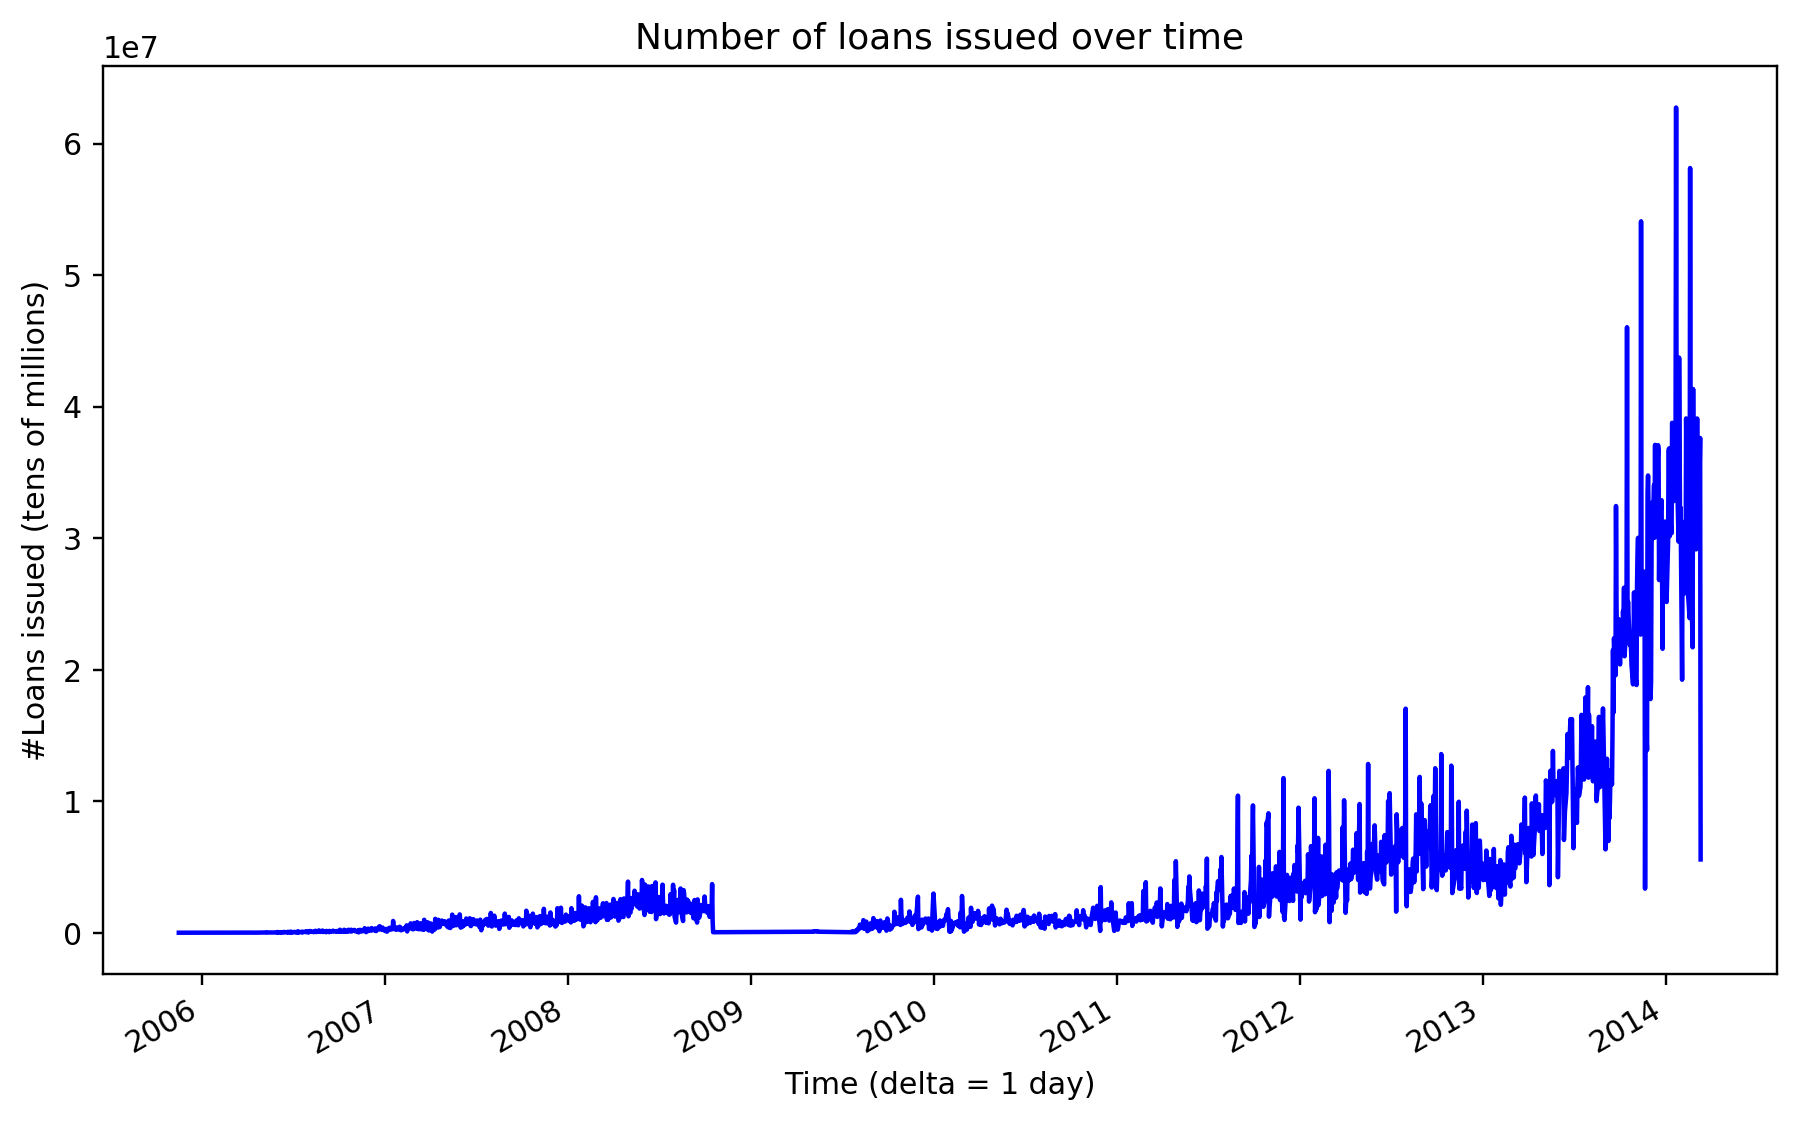

In [62]:
#time series plot for `sum_loan_plot` by the day
create_fig('Time (Days)', '#Loans issued (tens of millions)', 'Number of loans issued over time')
sum_loan_time.plot(kind='line',color='blue')
plt.xlabel('Time (delta = 1 day)');

#### Findings

* the number of loans disbursed changes with time
    * the number fluctuates
        * there are seemingly regular but wide fluctuations according to the time series
            * fluctuations in the periods Q4 2013 to Q2 2014 inclusive are remarkably wide
        * there are little to no fluctuations starting Q4 2008 to Q3 2009, inclusive (this is exactly 12 months)
        * the highest number of loans issued, in a year, before 2011 were issued in 2008 according to the bar chart

* there appears to be an exponential trend
    * trend shows that number of loans issued appears to increase exponentially despite the fluctuations



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

<div id="bivar"></div>

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<div id="multivar"></div>

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

<div id="summary"></div>

## Summary of Findings

<div id="outro"></div>

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

